In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# Training metrics

In [3]:
train_columns = ["name", "epoch", "train_loss", "val_loss", "val_acc", "val_auroc", "val_auprc"]

train_baseline = ["baseline", 57, 0.249368, 0.279520, 0.886716, 0.863429, 0.555176]
train_03 = ["0.3 drop", 69, 0.289284, 0.292824, 0.883302, 0.846445, 0.527162]
train_05 = ["0.5 drop", 74, 0.312713, 0.311563, 0.877716, 0.815090, 0.467840]
train_concrete = ["concrete drop", 11, 0.255627, 0.288171, 0.887647, 0.852165, 0.545930]

train_c_baseline = ["c-baseline", 18, 0.265587, 0.278306, 0.885165, 0.864554, 0.559507]
train_c_03 = ["c-0.3 drop", 73, 0.294920, 0.290423, 0.884233, 0.846314, 0.531245]
train_c_05 = ["c-0.5 drop", 62, 0.316886, 0.313742, 0.872129, 0.814899, 0.448443]
train_c_concrete = ["c-concrete drop", 18, 0.254892, 0.282398, 0.887958, 0.861811, 0.556579]

training_metrics = pd.DataFrame(data=[train_baseline, train_03, train_05, train_concrete,
                                     train_c_baseline, train_c_03, train_c_05, train_c_concrete],
                                columns=train_columns)
training_metrics["name"] = training_metrics["name"].astype("string")

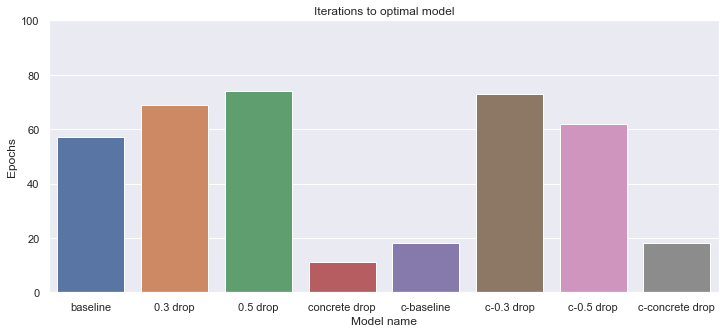

In [4]:
plt.figure(figsize=(12, 5))
sns.barplot(x="name", y="epoch", data=training_metrics)
plt.xlabel("Model name")
plt.ylabel("Epochs")
plt.ylim(0, 100)
plt.title("Iterations to optimal model")
plt.show()

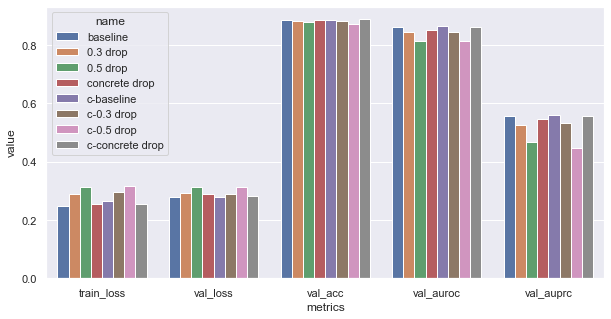

In [5]:
plt.figure(figsize=(10, 5))
training_metrics_melted = pd.melt(training_metrics,
                           id_vars=["name"],
                           value_vars=["train_loss", "val_loss", "val_acc", "val_auroc", "val_auprc"],
                           var_name="metrics")
sns.barplot(x="metrics", y="value", hue="name", data=training_metrics_melted)
plt.show()

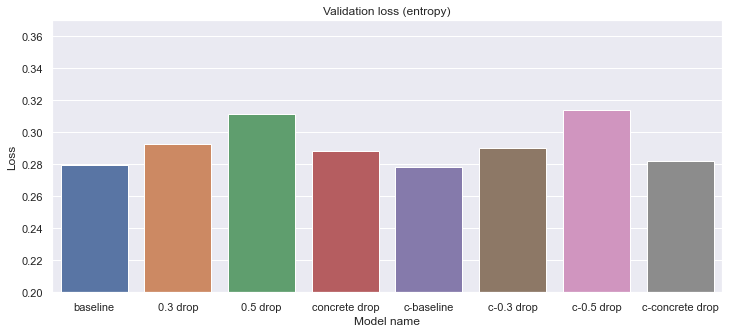

In [6]:
plt.figure(figsize=(12, 5))
sns.barplot(x="name", y="val_loss", data=training_metrics)
plt.xlabel("Model name")
plt.ylabel("Loss")
plt.ylim(0.20, 0.37)
plt.title("Validation loss (entropy)")
plt.show()

# Test metrics

In [7]:
test_columns = ["name", "entr", "acc", "pre_0", "pre_1", "rec_0", "rec_1", "auroc", "auprc", "minpse", "epis", "alea", "uncertainty"]

test_baseline = ["baseline", 0.26587815453112473, 0.8940049409866333, 0.9205342531204224, 0.5643153786659241, 0.9633123874664307, 0.3636363744735718, 0.8539716439272488, 0.4781193222878521, 0.4786096256684492]
test_03 = ["0.3 drop", 0.26438881113908824, 0.8998764157295227, 0.903113067150116, 0.7840909361839294, 0.9933612942695618, 0.18449197709560394, 0.8525758883694512, 0.5099098118943177, 0.47058823529411764, 0.00303400750271976, 0.0835852101445198, 0.08661922067403793]
test_05 = ["0.5 drop", 0.274401043504891, 0.8961681127548218, 0.9029993414878845, 0.686274528503418, 0.9888190031051636, 0.1871657818555832, 0.8386127273474665, 0.4632016589973929, 0.4656084656084656, 0.005050228908658028, 0.08416983485221863, 0.0892200618982315]
test_concrete = ["concrete drop", 0.2669386616446094, 0.8961681127548218, 0.9207195043563843, 0.5811966061592102, 0.965758204460144, 0.3636363744735718, 0.8500852027489098, 0.4863947293394888, 0.4946524064171123, 1.384819062375282e-16, 0.0782242938876152, 0.0782242938876152]

test_c_baseline = ["c-baseline", 0.2595379542951082, 0.8986402750015259, 0.9113636612892151, 0.6474359035491943, 0.980782687664032, 0.2700534760951996, 0.8579085341016529, 0.5004313835350334, 0.4786096256684492]
test_c_03 = ["c-0.3 drop", 0.2655097262505603, 0.8980222344398499, 0.9083871245384216, 0.6617646813392639, 0.983927309513092, 0.24064171314239502, 0.8505803503028807, 0.48695286731527965, 0.47058823529411764, 0.0025706076994538307, 0.08310987055301666, 0.08568047732114792]
test_c_05 = ["c-0.5 drop", 0.2848693079686964, 0.8924598097801208, 0.8955317735671997, 0.7241379022598267, 0.9944095015525818, 0.11229946464300156, 0.8312574505693263, 0.45326235192515213, 0.44533333333333336, 0.0033708070404827595, 0.10026935487985611, 0.10364016145467758]
test_c_concrete = ["c-concrete drop", 0.26659640684996977, 0.8936959505081177, 0.913872480392456, 0.5773195624351501, 0.9713487029075623, 0.29946523904800415, 0.8513520330945414, 0.4828176474054224, 0.48128342245989303, 1.224508547986749e-16, 0.06752833724021912, 0.06752833724021912]

test_metrics = pd.DataFrame(data=[test_baseline, test_03, test_05, test_concrete,
                                 test_c_baseline, test_c_03, test_c_05, test_c_concrete],
                                columns=test_columns)
test_metrics["name"] = test_metrics["name"].astype("string")

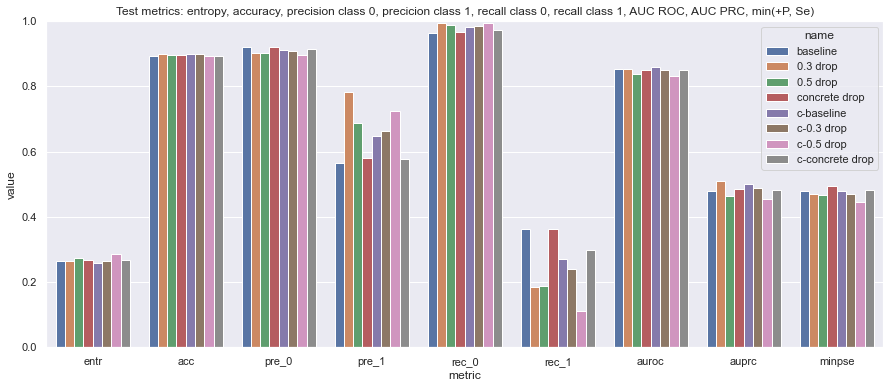

In [8]:
plt.figure(figsize=(15, 6))
test_metrics_melted = pd.melt(test_metrics, id_vars=["name"],
        value_vars=["entr", "acc", "pre_0", "pre_1", "rec_0", "rec_1", "auroc", "auprc", "minpse"],
        var_name="metric")

sns.barplot(x="metric", y="value", data=test_metrics_melted, hue="name")
plt.ylim(0, 1)
plt.title("Test metrics: entropy, accuracy, precision class 0, precicion class 1, recall class 0, recall class 1, AUC ROC, AUC PRC, min(+P, Se)")
plt.show()

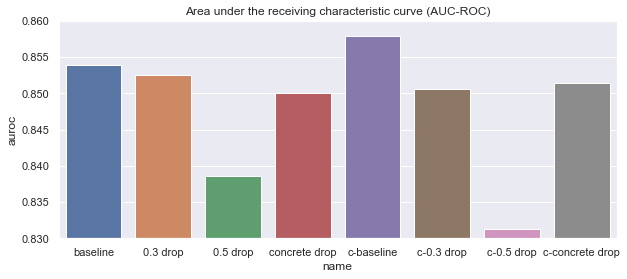

In [9]:
plt.figure(figsize=(10, 4))
sns.barplot(x="name", y="auroc", data=test_metrics)
plt.ylim(0.83, 0.86)
plt.title("Area under the receiving characteristic curve (AUC-ROC)")
plt.show()

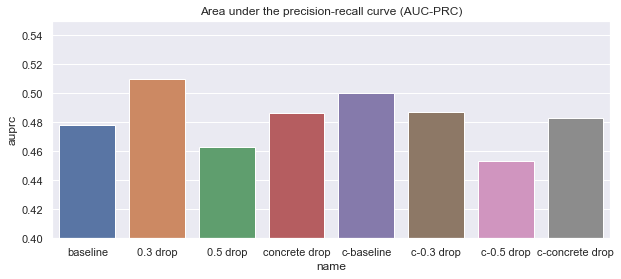

In [10]:
plt.figure(figsize=(10, 4))
sns.barplot(x="name", y="auprc", data=test_metrics)
plt.ylim(0.4, 0.55)
plt.title("Area under the precision-recall curve (AUC-PRC)")
plt.show()

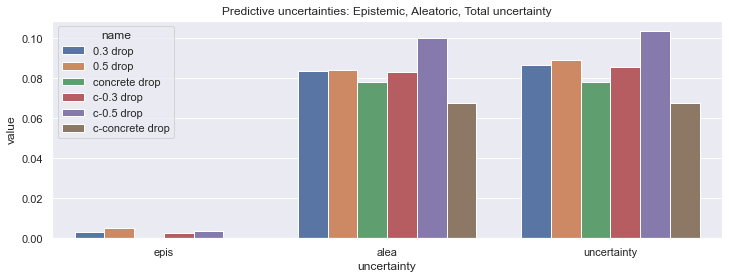

In [11]:
uncertainty_metrics = pd.melt(test_metrics[test_metrics["uncertainty"].notnull()], id_vars=["name"],
        value_vars=["epis", "alea", "uncertainty"],
        var_name="uncertainty")

plt.figure(figsize=(12, 4))
sns.barplot(x="uncertainty", y="value", hue="name", data=uncertainty_metrics)
plt.title("Predictive uncertainties: Epistemic, Aleatoric, Total uncertainty")
plt.show()

# Partially trained uncertainty
Epistemic uncertainty trending over training dataset sizes

In [12]:
# Concrete
ue_columns = ["name", "train_size", "epistemic", "aleatoric", "uncertainty"]

concrete_un_10 = ["concrete", 10, 1.496601073982146e-16, 0.10054492950439453, 0.10054492950439453]
concrete_un_20 = ["concrete", 20, 1.3384683607103426e-16, 0.08349242806434631, 0.08349242806434631]
concrete_un_30 = ["concrete", 30, 1.5855566064516905e-16, 0.08115082234144211, 0.08115082234144211]
concrete_un_40 = ["concrete", 40, 1.3815872346348128e-16, 0.07941998541355133, 0.07941998541355133]
concrete_un_50 = ["concrete", 50, 1.4553665836675205e-16, 0.08477380126714706, 0.08477380126714706]
concrete_un_60 = ["concrete", 60, 1.3298081105691574e-16, 0.08417218923568726, 0.08417218923568726]
concrete_un_70 = ["concrete", 70, 1.4853589615386112e-16, 0.07878849655389786, 0.07878849655389786]
concrete_un_80 = ["concrete", 80, 1.563692303802893e-16, 0.07790380716323853, 0.07790380716323853]
concrete_un_90 = ["concrete", 90, 1.405770687023413e-16, 0.07743843644857407, 0.07743843644857407]
concrete_un_100 = ["concrete", 100, 1.224508547986749e-16, 0.06752833724021912, 0.06752833724021912]

drop_03_un_10 = ["0.3 drop", 10, 0.004895341116935015, 0.09681370109319687, 0.1017090454697609]
drop_03_un_20 = ["0.3 drop", 20, 0.004794477950781584, 0.08382467180490494, 0.08861915022134781]
drop_03_un_30 = ["0.3 drop", 30, 0.005054418463259935, 0.07458246499300003, 0.07963688671588898]
drop_03_un_40 = ["0.3 drop", 40, 0.004514836706221104, 0.08012654632329941, 0.08464138209819794]
drop_03_un_50 = ["0.3 drop", 50, 0.004454883746802807, 0.08046099543571472, 0.0849158763885498]
drop_03_un_60 = ["0.3 drop", 60, 0.005312192253768444, 0.07911758869886398, 0.0844297781586647]
drop_03_un_70 = ["0.3 drop", 70, 0.003571787616237998, 0.08113089948892593, 0.08470268547534943]
drop_03_un_80 = ["0.3 drop", 80, 0.0040560136549174786, 0.07986011356115341, 0.08391612768173218]
drop_03_un_90 = ["0.3 drop", 90, 0.0035286336205899715, 0.08572190999984741, 0.08925054222345352]
drop_03_un_100 = ["0.3 drop", 100, 0.0025706076994538307, 0.08310987055301666, 0.08568047732114792]

drop_05_un_10 = ["0.5 drop", 10, 0.006357843056321144, 0.08186886459589005, 0.08822670578956604]
drop_05_un_20 = ["0.5 drop", 20, 0.0045853168703615665, 0.0958813950419426, 0.10046671330928802]
drop_05_un_30 = ["0.5 drop", 30, 0.005680232774466276, 0.09451662003993988, 0.10019685328006744]
drop_05_un_40 = ["0.5 drop", 40, 0.004432265646755695, 0.09550411254167557, 0.09993638098239899]
drop_05_un_50 = ["0.5 drop", 50, 0.004676482640206814, 0.09692995250225067, 0.10160643607378006]
drop_05_un_60 = ["0.5 drop", 60, 0.004072094336152077, 0.09535639733076096, 0.09942848980426788]
drop_05_un_70 = ["0.5 drop", 70, 0.004261092282831669, 0.09190623462200165, 0.09616732597351074]
drop_05_un_80 = ["0.5 drop", 80, 0.0038102141115814447, 0.08736537396907806, 0.09117558598518372]
drop_05_un_90 = ["0.5 drop", 90, 0.003953641280531883, 0.08593284338712692, 0.08988648653030396]
drop_05_un_100 = ["0.5 drop", 100, 0.005050228908658028, 0.08416983485221863, 0.0892200618982315]

drop_c05_un_10 = ["c-0.5 drop", 10, 0.005502938758581877, 0.09903331845998764, 0.1045362576842308]
drop_c05_un_20 = ["c-0.5 drop", 20, 0.0036761127412319183, 0.09838523715734482, 0.10206134617328644]
drop_c05_un_30 = ["c-0.5 drop", 30, 0.003210094291716814, 0.08732586354017258, 0.0905359610915184]
drop_c05_un_40 = ["c-0.5 drop", 40, 0.0040429201908409595, 0.09327179193496704, 0.09731471538543701]
drop_c05_un_50 = ["c-0.5 drop", 50, 0.0035728109069168568, 0.08432434499263763, 0.0878971591591835]
drop_c05_un_60 = ["c-0.5 drop", 60, 0.0037573878653347492, 0.09818624705076218, 0.10194363445043564]
drop_c05_un_70 = ["c-0.5 drop", 70, 0.003104212461039424, 0.08419426530599594, 0.08729847520589828]
drop_c05_un_80 = ["c-0.5 drop", 80, 0.003902954049408436, 0.08839797973632812, 0.09230093657970428]
drop_c05_un_90 = ["c-0.5 drop", 90, 0.0036408002488315105, 0.09662728011608124, 0.10026808083057404]
drop_c05_un_100 = ["c-0.5 drop", 100, 0.0033708070404827595, 0.10026935487985611, 0.10364016145467758]

uncertainty_edf = pd.DataFrame(data=[concrete_un_10, concrete_un_20, concrete_un_30, concrete_un_40, concrete_un_50,
                                   concrete_un_60, concrete_un_70, concrete_un_80, concrete_un_90, concrete_un_100,
                                   
                                   drop_03_un_10, drop_03_un_20, drop_03_un_30, drop_03_un_40, drop_03_un_50,
                                   drop_03_un_60, drop_03_un_70, drop_03_un_80, drop_03_un_90, drop_03_un_100,
                                   
                                   drop_05_un_10, drop_05_un_20, drop_05_un_30, drop_05_un_40, drop_05_un_50,
                                   drop_05_un_60, drop_05_un_70, drop_05_un_80, drop_05_un_90, drop_05_un_100,
                                   
                                   drop_c05_un_10, drop_c05_un_20, drop_c05_un_30, drop_c05_un_40, drop_c05_un_50,
                                   drop_c05_un_60, drop_c05_un_70, drop_c05_un_80, drop_c05_un_90, drop_c05_un_100],
                             columns=ue_columns)
uncertainty_edf["name"] = uncertainty_edf["name"].astype("string")

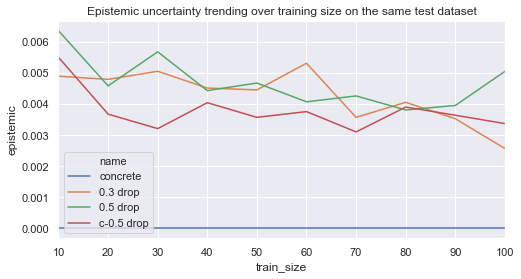

In [13]:
plt.figure(figsize=(8, 4))
sns.lineplot(x="train_size", y="epistemic", hue="name", data=uncertainty_edf)
plt.xlim(10, 100)
plt.title("Epistemic uncertainty trending over training size on the same test dataset")
plt.show()

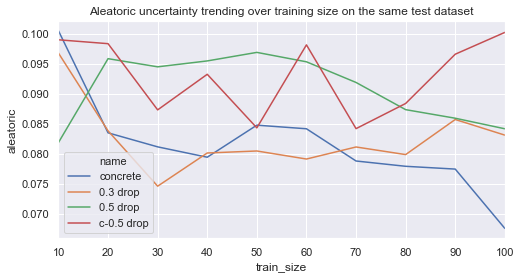

In [15]:
plt.figure(figsize=(8, 4))
sns.lineplot(x="train_size", y="aleatoric", hue="name", data=uncertainty_edf)
plt.xlim(10, 100)
plt.title("Aleatoric uncertainty trending over training size on the same test dataset")
plt.show()

# Augmented test 

In [16]:
ua_columns = ["name", "epis", "alea", "uncertainty", "aug_epis", "aug_alea", "aug_uncertainty"]

drop_03_un = ["0.3 drop", 0.00303400750271976, 0.0835852101445198, 0.08661922067403793, 0.03670433908700943, 0.06409983336925507, 0.1008041724562645]
drop_05_un = ["0.5 drop", 0.005050228908658028, 0.08416983485221863, 0.0892200618982315, 0.04331677779555321, 0.09348197281360626, 0.13679875433444977]
drop_10_un = ["concrete drop", 1.384819062375282e-16, 0.0782242938876152, 0.0782242938876152, 9.291531885372988e-17, 0.03666616603732109, 0.03666616603732109]

drop_c03_un = ["c-0.3 drop", 0.0025706076994538307, 0.08310987055301666, 0.08568047732114792, 0.03696862608194351, 0.13935184478759766, 0.17632046341896057]
drop_c05_un = ["c-0.5 drop", 0.0033708070404827595, 0.10026935487985611, 0.10364016145467758, 0.03188493102788925, 0.20699869096279144, 0.2388836145401001]
drop_c10_un = ["c-concrete drop", 1.224508547986749e-16, 0.06752833724021912, 0.06752833724021912, 2.4778970548870478e-15, 0.0680253878235817, 0.0680253878235817]

uncertainty_udf = pd.DataFrame(data=[drop_03_un, drop_05_un, drop_10_un,
                                    drop_c03_un, drop_c05_un, drop_c10_un],
                              columns=ua_columns)
uncertainty_udf["name"] = uncertainty_udf["name"].astype("string")

In [17]:
uncertainty_udf_melted = pd.melt(uncertainty_udf, id_vars=["name"],
                                 value_vars=["alea",  "aug_alea", "epis", "aug_epis"],
                                var_name="uncertainty")

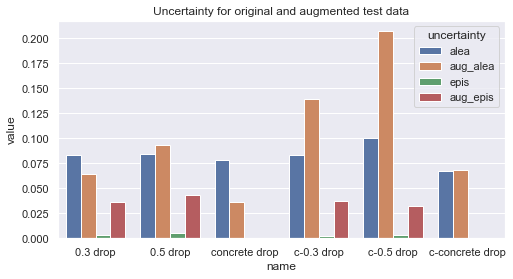

In [18]:
plt.figure(figsize=(8, 4))
sns.barplot(x="name", y="value", hue="uncertainty", data=uncertainty_udf_melted)
plt.title("Uncertainty for original and augmented test data")
plt.show()